In [45]:
import pandas as pd 
import numpy as np
import json
import os
import glob
import random
import imageio.v3 as io
from collections import defaultdict
import matplotlib.pyplot as plt

### Load four arbitrary images and their corresponding segmentation masks and metadata

In [205]:
path = "Mini_BAGLS_dataset"
seg_ima_paths = glob.glob(f"{path}/*seg.png")
images_paths = [im_path for im_path in glob.glob(f"{path}/*.png") if im_path not in seg_ima_paths]

random.seed(5)
images_dict = defaultdict(dict)
selected_images_paths = random.sample(images_paths, 4)
for img_path in selected_images_paths:
    path_without_extension = img_path.split(".")[0]
    file_name = path_without_extension.split("/")[1]
    images_dict[file_name]['image'] = (io.imread(img_path))
    with open(f"{path_without_extension}.meta", 'r') as file:
        images_dict[file_name]['meta'] = (json.load(file))
    images_dict[file_name]['seg_image'] = (io.imread(f"{path_without_extension}_seg.png"))


### Plot the images with the segmentation masks overlaid in a picture

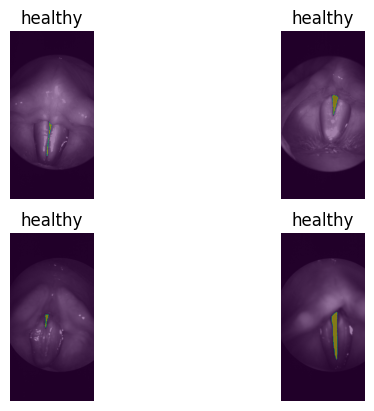

In [213]:
fig = plt.figure()
for idx, img_data in enumerate(images_dict.values()):
    fig.add_subplot(2, 2, idx + 1)
    plt.imshow(img_data['image'])
    plt.imshow(img_data['seg_image'], alpha=0.5)
    plt.axis('off')
    plt.title(img_data['meta']["Subject disorder status"])

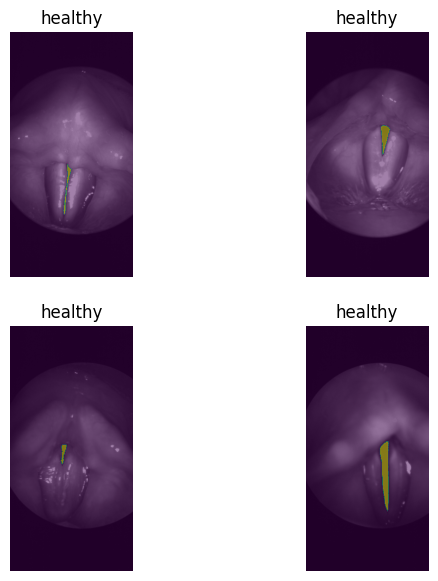

In [214]:
fig = plt.figure(figsize=(7,7))
for idx, img_data in enumerate(images_dict.values()):
    fig.add_subplot(2, 2, idx + 1)
    plt.imshow(img_data['image'])
    plt.imshow(img_data['seg_image'], alpha=0.5)
    plt.axis('off')
    plt.title(img_data['meta']["Subject disorder status"])

###  Implement the following three variations to convert an image from RGB to Grayscale on “leaves.jpg”

![image](image_trasnformation.png)


In [70]:
leaves_image = io.imread('leaves.jpg')


In [185]:
# Lightness Method
lightness_gr_im = np.max(leaves_image,axis=-1)/2 + np.min(leaves_image,axis=-1)/2
# Average method
avg_gr_im = np.mean(leaves_image,axis=-1)
# Luminosity method
luminosity_coef = [0.2989, 0.587, 0.114]
luminosity_gr_im = np.dot(leaves_image, luminosity_coef)

gr_images = {'Original': leaves_image, 'Lightness': lightness_gr_im, 'Average': avg_gr_im, 'Luminosity': luminosity_gr_im}

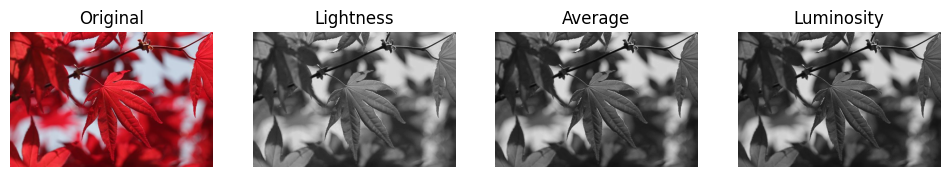

In [203]:
fig = plt.figure(figsize=(12,25))
for idx, (title, img) in enumerate(gr_images.items(), start=1):
    fig.add_subplot(1, 4, idx)
    plt.imshow(img, cmap='gray')
    plt.axis('off')
    plt.title(title)

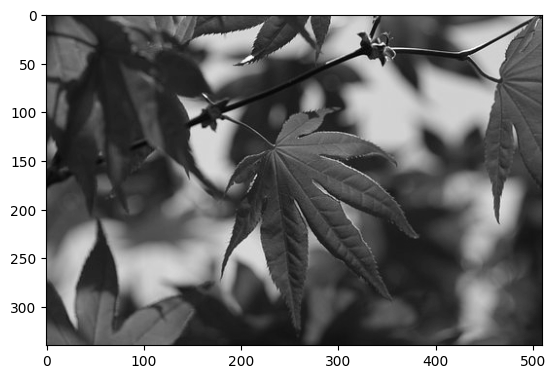

In [178]:
plt.imshow(np.dot(leaves_image, luminosity_constant), cmap='gray')